In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_excel("Online Retail.xlsx")

In [3]:
pd.pandas.set_option('display.max_columns',None)

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
for i in data.columns:
    count=data[i].nunique()

In [6]:
count

38

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
from prettytable import PrettyTable
unique=PrettyTable()
unique.field_names=["feature","unique"]
for i in data.columns:
    count=data[i].nunique()
    unique.add_row([i,count])
print(unique)

+-------------+--------+
|   feature   | unique |
+-------------+--------+
|  InvoiceNo  | 25900  |
|  StockCode  |  4070  |
| Description |  4223  |
|   Quantity  |  722   |
| InvoiceDate | 23260  |
|  UnitPrice  |  1630  |
|  CustomerID |  4372  |
|   Country   |   38   |
+-------------+--------+


In [9]:
customer_country=data[['Country','CustomerID']].drop_duplicates()

In [10]:
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').sort_values(ascending=False)

Country
United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Israel                     4
Greece                     4
EIRE                       3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Lithuania                  1
Czech Republic             1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

In [11]:
display(customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False))

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<AxesSubplot:>

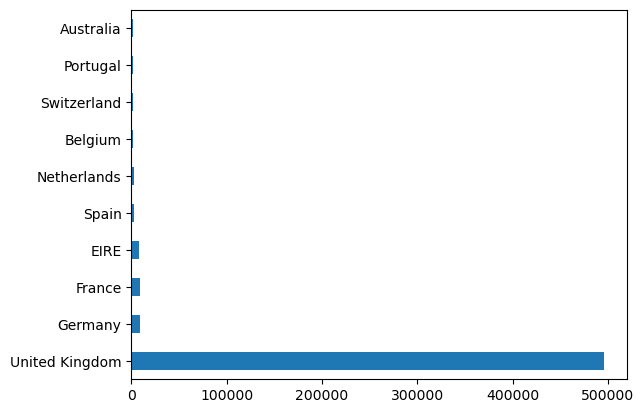

In [13]:
data['Country'].value_counts()[:10].plot(kind='barh')

In [14]:
data=data[data['Quantity']>0]

In [15]:
data.shape

(531285, 8)

In [16]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [19]:
data.dropna(inplace=True)

In [20]:
data.shape

(397924, 8)

In [21]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
data['total']=data['UnitPrice']*data['Quantity']

In [23]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   total        397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [25]:
from datetime import timedelta
date=data['InvoiceDate'].max()+timedelta(days=1)
print('Last Invoice date',data['InvoiceDate'].max())
print('Regency',date)

Last Invoice date 2011-12-09 12:50:00
Regency 2011-12-10 12:50:00


In [26]:
RMF=data.groupby(['CustomerID']).agg({
    'InvoiceDate':lambda x: (date-x.max()).days,
    'InvoiceNo':'count',
    'total':'sum'
})

In [27]:
RMF.rename(columns={'InvoiceDate':'Regency','InvoiceNo':'Frequency','total':'Monetry'},inplace=True)

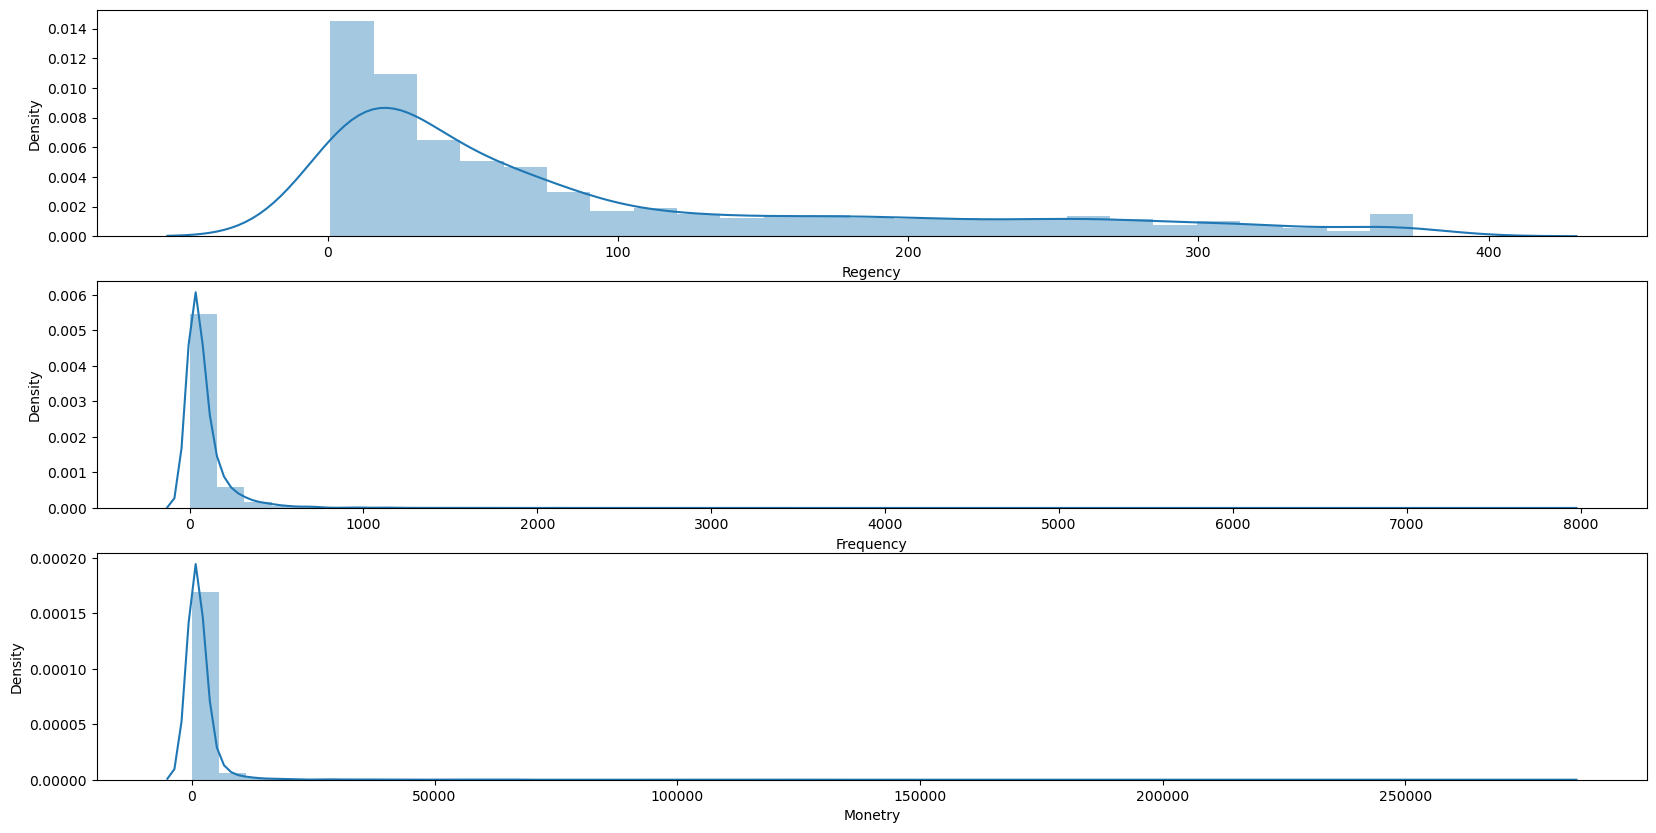

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1);
sns.distplot(RMF['Regency'])
plt.subplot(3,1,2);
sns.distplot(RMF['Frequency'])
plt.subplot(3,1,3);
sns.distplot(RMF['Monetry'])
plt.show()

In [29]:
RMF.head()

,Regency,Frequency,Monetry
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [30]:
RMF.shape

(4339, 3)

In [31]:
data.groupby(['CustomerID'])['Country'].count()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    756
18287.0     70
Name: Country, Length: 4339, dtype: int64

In [32]:
Rlabel=range(4,0,-1)
Flabel=range(1,5)
Mlabel=range(1,5)
Rgrp=pd.qcut(RMF['Regency'],q=4,labels=Rlabel)
Fgrp=pd.qcut(RMF['Frequency'],q=4,labels=Flabel)
Mgrp=pd.qcut(RMF['Monetry'],q=4,labels=Mlabel)

In [33]:
RMF['R']=Rgrp.values
RMF['F']=Fgrp.values
RMF['M']=Mgrp.values

In [34]:
RMF.head()

,Regency,Frequency,Monetry,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [35]:
RMF['Concat']=RMF.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']),axis=1)

In [58]:
RMF.head()

,Regency,Frequency,Monetry,R,F,M,Concat,Score,Lvl
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6,Loyal
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,Premier
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Good
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Premier
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Potential


In [37]:
RMF['Score']=RMF[['R','F','M']].sum(axis=1)

In [38]:
RMF.head()

,Regency,Frequency,Monetry,R,F,M,Concat,Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,310,17,334.40,1,1,2,1.01.02.0,4


In [39]:
RMF['Score'].unique()

array([ 6, 12,  8, 10,  4,  3,  7, 11,  9,  5], dtype=int64)

In [40]:
def customer_type(df):
    if(df['Score']>9):
        return 'Premier'
    elif (df['Score']<9)and (df['Score']>=7): return 'Good'
    elif (df['Score']<7)and (df['Score']>=6): return 'Loyal'
    elif (df['Score']<5)and (df['Score']>=4): return 'Potential' 
    elif (df['Score']<4)and (df['Score']>=3): return 'Promising'
    elif (df['Score']<3)and (df['Score']>=1): return 'Need_Attention'
    else:
        return 'No_Activation'

In [41]:
RMF['Lvl']=RMF.apply(customer_type,axis=1)

In [42]:
RMF.head()

,Regency,Frequency,Monetry,R,F,M,Concat,Score,Lvl
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6,Loyal
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,Premier
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Good
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Premier
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Potential


In [43]:
RMF.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Regency    4339 non-null   int64   
 1   Frequency  4339 non-null   int64   
 2   Monetry    4339 non-null   float64 
 3   R          4339 non-null   category
 4   F          4339 non-null   category
 5   M          4339 non-null   category
 6   Concat     4339 non-null   object  
 7   Score      4339 non-null   int64   
 8   Lvl        4339 non-null   object  
dtypes: category(3), float64(1), int64(3), object(2)
memory usage: 250.4+ KB


## K-Means model

In [54]:
kmeans = RMF.copy()
# taking only relevant columns
kmeans = df_kmeans.iloc[:,:3]
kmeans.head()

,Regency,Frequency,Monetry
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [55]:
kmeans.head()

,Regency,Frequency,Monetry
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [56]:
kmeans.columns

Index(['Regency', 'Frequency', 'Monetry'], dtype='object')

In [57]:
kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Regency    4339 non-null   int64  
 1   Frequency  4339 non-null   int64  
 2   Monetry    4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


In [48]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


<AxesSubplot:xlabel='total'>

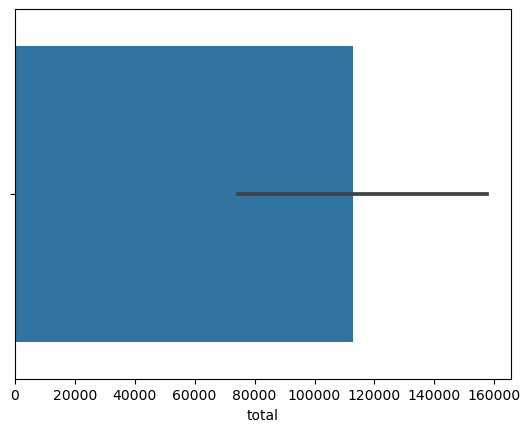

In [52]:
sns.barplot(data[data['Country']=='United Kingdom'].groupby('CustomerID')['total'].sum().sort_values(ascending=False).head(10))

In [53]:
RMF.head()

,Regency,Frequency,Monetry,R,F,M,Concat,Score,Lvl
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6,Loyal
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,Premier
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Good
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Premier
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Potential


In [59]:
kmeans.shape

(4339, 3)

In [60]:
RMF.shape

(4339, 9)

In [61]:
data.shape

(397924, 9)

In [63]:
recency = pd.DataFrame(data.groupby('CustomerID')['InvoiceDate'].max().reset_index())
recency['InvoiceDate'] = pd.to_datetime(recency['InvoiceDate']).dt.date
recency['MaxDate'] = recency['InvoiceDate'].max()
recency['recency'] = (recency['MaxDate'] - recency['InvoiceDate']).dt.days + 1
recency = recency[['CustomerID','recency']]
recency.head()

,CustomerID,recency
0,12346.0,326
1,12347.0,3
2,12348.0,76
3,12349.0,19
4,12350.0,311


In [64]:
recency.shape

(4339, 2)

In [65]:
frequency = pd.DataFrame(data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index())
frequency.columns = ['fCustomerID','frequency']
frequency.head()

,fCustomerID,frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [67]:
monetary = pd.DataFrame(data.groupby('CustomerID')['total'].sum().reset_index())
monetary.columns = ['mCustomerID','monetary']
monetary.head()

,mCustomerID,monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [68]:
rfm = pd.concat([recency,frequency,monetary], axis=1)
rfm.drop(['fCustomerID','mCustomerID'], axis=1, inplace=True)
rfm.head(10)

,CustomerID,recency,frequency,monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40
5,12352.0,37,8,2506.04
6,12353.0,205,1,89.00
7,12354.0,233,1,1079.40
8,12355.0,215,1,459.40
9,12356.0,23,3,2811.43


In [70]:
df_kmeans = rfm.copy()
# taking only relevant columns
df_kmeans = df_kmeans.iloc[:,:4]
df_kmeans.head()

,CustomerID,recency,frequency,monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


# Kmeans model

In [71]:
# Removing outliers for Monetary
Q1 = df_kmeans.monetary.quantile(0.05)
Q3 = df_kmeans.monetary.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.monetary >= Q1 - 1.5*IQR) & (df_kmeans.monetary <= Q3 + 1.5*IQR)]

# Removing outliers for Recency
Q1 = df_kmeans.recency.quantile(0.05)
Q3 = df_kmeans.recency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.recency >= Q1 - 1.5*IQR) & (df_kmeans.recency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = df_kmeans.frequency.quantile(0.05)
Q3 = df_kmeans.frequency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.frequency >= Q1 - 1.5*IQR) & (df_kmeans.frequency <= Q3 + 1.5*IQR)]

In [72]:
df_kmeans = df_kmeans.reset_index(drop=True)
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4262 entries, 0 to 4261
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4262 non-null   float64
 1   recency     4262 non-null   int64  
 2   frequency   4262 non-null   int64  
 3   monetary    4262 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 133.3 KB


In [73]:
df_kmeans = df_kmeans.iloc[:,1:]

In [74]:
df_kmeans.head()

,recency,frequency,monetary
0,3,7,4310.00
1,76,4,1797.24
2,19,1,1757.55
3,311,1,334.40
4,37,8,2506.04


In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
std_scalar=StandardScaler()

In [79]:
df_kmeans_norm =std_scalar.fit_transform(df_kmeans)

In [80]:
df_kmeans_norm = pd.DataFrame(df_kmeans_norm)
df_kmeans_norm.columns = ['recency','frequency','monetary']
df_kmeans_norm.head()

,recency,frequency,monetary
0,-0.912442,0.871531,1.649061
1,-0.183020,0.094825,0.261545
2,-0.752569,-0.681880,0.239629
3,2.165119,-0.681880,-0.546217
4,-0.572711,1.130433,0.652936


In [81]:
from sklearn.cluster import KMeans

In [82]:
model=KMeans(n_clusters=5)

In [83]:
model.fit(df_kmeans_norm)

KMeans(n_clusters=5)

In [84]:
df_kmeans['Clusters']=model.labels_

In [85]:
df_kmeans.head()

,recency,frequency,monetary,Clusters
0,3,7,4310.00,0
1,76,4,1797.24,3
2,19,1,1757.55,4
3,311,1,334.40,1
4,37,8,2506.04,3


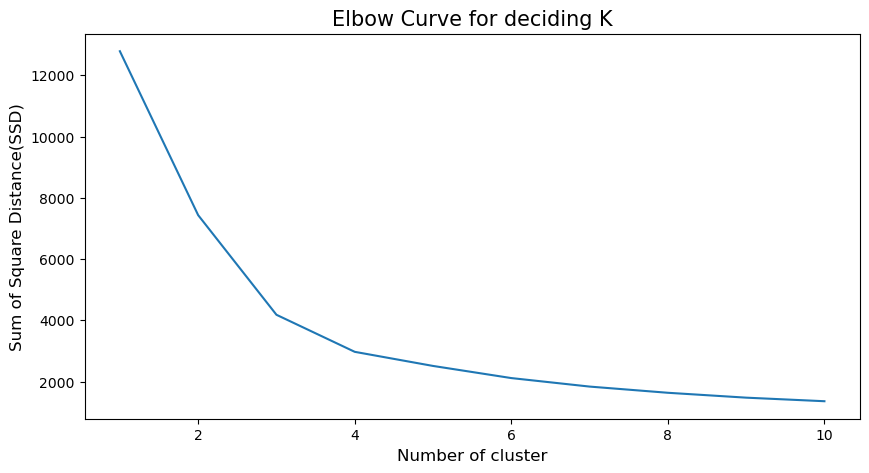

In [86]:
ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11,1), ssd)
plt.xlabel('Number of cluster', size=12)
plt.ylabel('Sum of Square Distance(SSD)', size=12)
plt.title('Elbow Curve for deciding K', size=15)
plt.show()

In [88]:
from sklearn.metrics import silhouette_score

In [89]:
for num_clusters in list(range(2,11)):
    # intialise kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    
    cluster_labels = model_clus.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_kmeans_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5452065181568104
For n_clusters=3, the silhouette score is 0.5112183746271296
For n_clusters=4, the silhouette score is 0.4870303470482212
For n_clusters=5, the silhouette score is 0.4416615268658407
For n_clusters=6, the silhouette score is 0.4175856396197244
For n_clusters=7, the silhouette score is 0.4196355137644177
For n_clusters=8, the silhouette score is 0.387657120815051
For n_clusters=9, the silhouette score is 0.3889862766974822
For n_clusters=10, the silhouette score is 0.34917436096927623


In [90]:
model_clus3 = KMeans(n_clusters = 3)
model_clus3.fit(df_kmeans_norm)

KMeans(n_clusters=3)

In [91]:
df_kmeans['clusters'] = model_clus3.labels_
df_kmeans.head()

,recency,frequency,monetary,Clusters,clusters
0,3,7,4310.00,0,0
1,76,4,1797.24,3,1
2,19,1,1757.55,4,1
3,311,1,334.40,1,2
4,37,8,2506.04,3,1


In [92]:
df_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary,Clusters
clusters,,,,
0,22.0,13.0,5474.0,1.0
1,46.0,3.0,1024.0,4.0
2,249.0,1.0,434.0,1.0


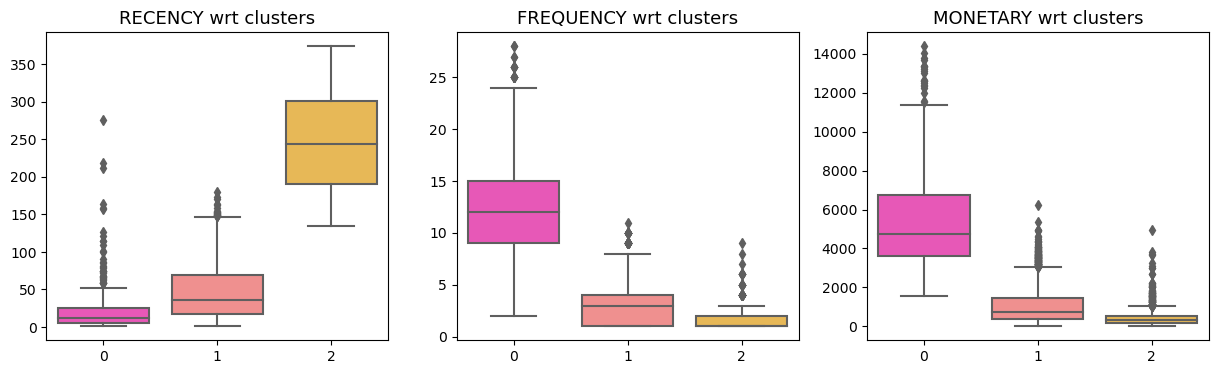

In [93]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df_kmeans[j], x=df_kmeans['clusters'], palette='spring')
    plt.title('{} wrt clusters'.format(j.upper()), size=13)
    plt.ylabel('')
    plt.xlabel('')

plt.show()

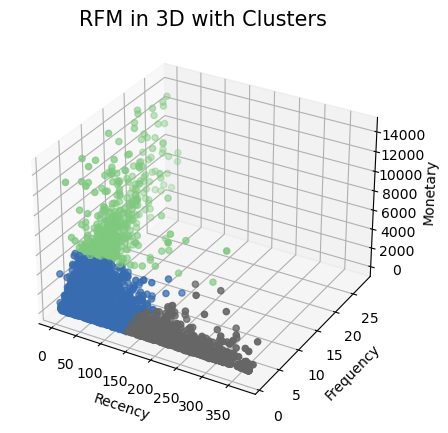

In [94]:
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(df_kmeans.recency, df_kmeans.frequency, df_kmeans.monetary, c=df_kmeans.clusters, cmap='Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()